# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 02: Extracción y Transformación de Datos </center></h1>

**Fecha de Entrega:** 25 de septiembre de 2025, a las 23:59.

**Fecha de publicación**: 2 de septiembre de 2025.

**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 02 habilitado en Canvas.

## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tarea.

- Deben hacer sus consultas y comentarios sobre la Tarea a través del canal de Tareas en el Foro del curso en Canvas.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, queremos comprender y visualizar la distribución de aves migratorias en el territorio chileno. Específicamente, queremos entender las diferencias entre las migraciones de 2 especies en particular, el run-run y la dormilona tontita, a partir de los avistamientos registrados en eBird durante un periodo de 3 años y medio.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

### 1.4 Ejemplo de visualización

Esta tarea se enfoca en datos de aves. Para complementarla, les compartimos la siguiente página web, llamada "Bird Migration Explorer" que les permite visualizar, de una forma novedosa e interesante, las rutas de migración de aves en las Americas. Visiten la página para que vean cómo se puede visualizar datos de una manera interesante y novedosa, que podría ustedes usar en el futuro para sus proyectos.

In [38]:
from IPython.display import IFrame
IFrame("https://explorer.audubon.org/home?layersPanel=expand", width=900, height=600)

## 2. Datos

Los datos a utilizar provienen de la plataforma **[eBird](https://ebird.org/)**, una aplicación desarrollada por The Cornell Lab of Ornithology que permite a sus usuarios registrar y compartir avistamientos de aves en todo el mundo. La plataforma dispone de una API mediante la cual se pueden realizar consultas sobre avistamientos de aves recientes e históricos, especies según región, taxonomía, entre otros. 

### 2.1 Acceso a la API

Muchas API pueden utilizarse solo mediante el uso de una clave única, o "API key". Para conseguir una API key en eBird, primero debe ser usuario de la plataforma. Puede crear una cuenta aquí: https://secure.birds.cornell.edu/identity/account/create


Con una cuenta ya creada, puede ingresar a https://ebird.org/api/keygen para generar su llave. Debe llenar un formulario de solicitud al pedir su llave. Como sugerencia, puede llenar los campos con la siguiente información:

* **Organización:** Pontificia Universidad Católica de Chile
* **Título del Proyecto:** Tarea IMT2200 Introducción a Ciencia de Datos
* **Descripción:** "Uso educativo para exploración y análisis de distribución de aves migratorias en Chile."
* **Tipo de Proyecto:** Academic/Student
* **Casos de uso:** Materiales educativos y artíticos (...)

Debería recibir su llave inmediatamente después de enviar su solicitud. Como recomendación, puede revisar la documentación de la API en el siguiente link: https://documenter.getpostman.com/view/664302/S1ENwy59#intro

#### 2.2 Mapoteca de BCN

Para esta tarea queremos visualizar el movimiento de aves a lo largo de nuestro país. Para ello, también necesitaremos manejar datos geoespaciales: específicamente, trabajaremos con un mapa vectorial de Chile disponible en la página web de la Biblioteca del Congreso Nacional: https://www.bcn.cl/siit/mapas_vectoriales/index_html

Descargue el archivo `.zip` para las **Divisiones regionales** y descomprímalo. Dentro de esta carpeta, habrá un archivo llamado `Regional.shp`, que utilizaremos con `geopandas` para graficar nuestro mapa de Chile.

### 2.3 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import requests
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 Extracción de datos (1.5 puntos)

**(1 pto)** Vamos a crear nuestra base de datos con los avistamientos registrados en eBird dentro de Chile desde 2022 hasta 2025. Revise la documentación de la API y averigue cómo extraer los avistamientos de un día. Luego extraiga los avistamientos para todos los días desde el **1 de enero de 2022 hasta el 31 de julio de 2025.** Cuando haya logrado extraer todos los datos, guárdelos en un archivo CSV o parquet.

Responda:

**a) (0.2 pts)** ¿Cuántos avistamientos tiene su dataset?

**b) (0.3 pts)** Obtenga la cantidad de veces que se repite cada especie en su dataset y ordénelas de mayor a menor. ¿Qué pasa con la cantidad de avistamientos según especie? ¿Por qué?

**Recomendaciones:** 
* Puede usar la librería `datetime` para generar fechas: cree una lista con todas las fechas e itere sobre esta lista para hacer los llamados a la API.
* **Pruebe primero con uno o dos días** para verificar el funcionamiento de su código y de la API.
* Inspeccione la forma en la que vienen los datos.
* Vaya guardando los datos extraídos en archivos (CSV o parquet), de modo que no tenga que repetir los llamados en caso de algún error.

**Hint**: Los códigos regionales chilenos para la API son los siguientes,
* `regionCode = CL`
* `sppLocale = es_CL` (para obtener nombres chilenos de las aves)

In [18]:
api_key = "6a61job99msl"
headers = {'X-eBirdApiToken': api_key}
params = {"sppLocale" : "es_CL"}
año_inicio = 2022
año_final = 2025
meses = range(1,13)
datos = []
salir = False
if os.path.exists('DataFrame.parquet'):
    df = pd.read_parquet('DataFrame.parquet')
else:
    for año in range(año_inicio, año_final + 1):
        for mes in meses:
            dias_mes = 31
            for dia in range(1, dias_mes + 1):
                url = f"https://api.ebird.org/v2/data/obs/CL/historic/{año}/{mes}/{dia}"
                respuesta = requests.get(url, headers=headers, params=params)
                if respuesta.status_code == 200 and len(respuesta.json()) != 0:
                    datos.extend(respuesta.json())
                if año == 2025 and mes == 7 and dia == 31:
                    salir = True
                    break
            if salir:
                break
        if salir:
            break
    df = pd.DataFrame(datos)
    df.to_parquet('DataFrame.parquet', index=False)
df.head()


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,soulap1,Queltehue común,Vanellus chilensis,L10140471,"Villa Parque Austral, Osorno, Región de los La...",2022-01-01 23:41,3.0,-40.585844,-73.113157,True,False,True,S99916680,None
1,bkfibi1,Bandurria común,Theristicus melanopis,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18,4.0,-53.214573,-70.947665,True,False,True,S100024876,None
2,grhowl2,Tucúquere,Bubo magellanicus,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18,1.0,-53.214573,-70.947665,True,False,True,S100024876,None
3,austhr1,Zorzal patagónico,Turdus falcklandii,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18,1.0,-53.214573,-70.947665,True,False,True,S100024876,None
4,rucspa1,Chincol,Zonotrichia capensis,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18,2.0,-53.214573,-70.947665,True,False,True,S100024876,None


In [19]:

df.info()
#Respuesta:
# Se tienen originalmente 272199 de avistamientos en el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272199 entries, 0 to 272198
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   speciesCode      272199 non-null  object 
 1   comName          272199 non-null  object 
 2   sciName          272199 non-null  object 
 3   locId            272199 non-null  object 
 4   locName          272199 non-null  object 
 5   obsDt            272199 non-null  object 
 6   howMany          266895 non-null  float64
 7   lat              272199 non-null  float64
 8   lng              272199 non-null  float64
 9   obsValid         272199 non-null  bool   
 10  obsReviewed      272199 non-null  bool   
 11  locationPrivate  272199 non-null  bool   
 12  subId            272199 non-null  object 
 13  exoticCategory   6963 non-null    object 
dtypes: bool(3), float64(3), object(8)
memory usage: 23.6+ MB


In [20]:
frecuencia_especies = df["comName"].value_counts()
frecuencia_especies.info()
print(frecuencia_especies)
# Respuesta:
# Las especies mas avistadas en el data son tenca chilena, gaviota cahuil, rara, churrete patagonico y rayadito, y la menos avistadas son 
# arrocero americano, ansar cisnal, pato joyuyo, malvasia canela y birro grande, esto se debe a que las menos avistadas no son endemicas de chile, por lo que es correcto
# suponer que estas aves no estan presentes de forma habitual en el territorio chileno.


<class 'pandas.core.series.Series'>
Index: 533 entries, Tenca chilena to Birro grande
Series name: count
Non-Null Count  Dtype
--------------  -----
533 non-null    int64
dtypes: int64(1)
memory usage: 8.3+ KB
comName
Tenca chilena          1308
Gaviota cáhuil         1308
Rara                   1308
Churrete patagónico    1308
Rayadito               1308
                       ... 
Arrocero americano        1
Ánsar cisnal              1
Pato joyuyo               1
Malvasía canela           1
Birro grande              1
Name: count, Length: 533, dtype: int64


### 3.2 Tranformación (1 punto)

**a) (0.5 pts)** Transforme la columna `obsDt` de string a un objeto de tipo `datetime` únicamente con año, mes y día (YYYY-MM-DD). Luego, agregue las siguientes nuevas columnas:
* `month` con únicamente el mes del avistamiento (puede dejar el mes como número entero de 1 a 12).
* `year-month` con el mes y año fecha en formato YYYY-MM

In [21]:
df['obsDt'] = pd.to_datetime(df['obsDt'], errors='coerce')
#Limpiamos los datos NaN de obsDt
df = df.dropna(subset='obsDt')
df['month'] = df['obsDt'].dt.month.astype('Int64')
df['year-month'] = df['obsDt'].dt.strftime('%Y-%m')
df = df.dropna(subset='comName')
df.info()
conteo_cero = (df['month'] == 0).sum()
print(conteo_cero)


<class 'pandas.core.frame.DataFrame'>
Index: 271586 entries, 0 to 272198
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   speciesCode      271586 non-null  object        
 1   comName          271586 non-null  object        
 2   sciName          271586 non-null  object        
 3   locId            271586 non-null  object        
 4   locName          271586 non-null  object        
 5   obsDt            271586 non-null  datetime64[ns]
 6   howMany          266380 non-null  float64       
 7   lat              271586 non-null  float64       
 8   lng              271586 non-null  float64       
 9   obsValid         271586 non-null  bool          
 10  obsReviewed      271586 non-null  bool          
 11  locationPrivate  271586 non-null  bool          
 12  subId            271586 non-null  object        
 13  exoticCategory   6960 non-null    object        
 14  month            271586 n

**b) (0.5 pts)** Averigue cómo tranformar su DataFrame de Pandas en un GeoDataFrame de GeoPandas. Para esto, utilice las columnas `lat`y `lng` para generar los puntos de la nueva columna `geometry`. Para las visualizaciones siguientes utilizaremos el Coordinate Reference System (CRS) EPSG 4326 (también llamado [WGS 84](https://es.wikipedia.org/wiki/WGS84)). Asegúrese que sus coordenadas correspondan a este CRS al crear su GeoDataFrame.

In [22]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lng'],df['lat'], crs="EPSG:4326"))
gdf.info()
gdf.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 271586 entries, 0 to 272198
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   speciesCode      271586 non-null  object        
 1   comName          271586 non-null  object        
 2   sciName          271586 non-null  object        
 3   locId            271586 non-null  object        
 4   locName          271586 non-null  object        
 5   obsDt            271586 non-null  datetime64[ns]
 6   howMany          266380 non-null  float64       
 7   lat              271586 non-null  float64       
 8   lng              271586 non-null  float64       
 9   obsValid         271586 non-null  bool          
 10  obsReviewed      271586 non-null  bool          
 11  locationPrivate  271586 non-null  bool          
 12  subId            271586 non-null  object        
 13  exoticCategory   6960 non-null    object        
 14  month            

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory,month,year-month,geometry
0,soulap1,Queltehue común,Vanellus chilensis,L10140471,"Villa Parque Austral, Osorno, Región de los La...",2022-01-01 23:41:00,3.0,-40.585844,-73.113157,True,False,True,S99916680,None,1,2022-01,POINT (-73.11316 -40.58584)
1,bkfibi1,Bandurria común,Theristicus melanopis,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18:00,4.0,-53.214573,-70.947665,True,False,True,S100024876,None,1,2022-01,POINT (-70.94766 -53.21457)
2,grhowl2,Tucúquere,Bubo magellanicus,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18:00,1.0,-53.214573,-70.947665,True,False,True,S100024876,None,1,2022-01,POINT (-70.94766 -53.21457)
3,austhr1,Zorzal patagónico,Turdus falcklandii,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18:00,1.0,-53.214573,-70.947665,True,False,True,S100024876,None,1,2022-01,POINT (-70.94766 -53.21457)
4,rucspa1,Chincol,Zonotrichia capensis,L7988120,"Leñadura, Nuestra casa",2022-01-01 22:18:00,2.0,-53.214573,-70.947665,True,False,True,S100024876,None,1,2022-01,POINT (-70.94766 -53.21457)


### 3.3 Exploración del dataset (1 punto)

**a) (0.3 pts)** Utilice `geopandas` para leer el archivo `Regional.shp` descargado de BCN. Asegúrese de que su CRS sea el mismo que utilizó en la sección anterior.

In [23]:
gdf_archivo = gpd.read_file('C:/Users/Liz/Documents/Intro. a Ciencia de Datos/tarea 02/Regional.shp')
print(f'CRS original del archivo leido es {gdf_archivo.crs}')
gdf_transformado = gdf_archivo.to_crs("EPSG:4326")
print("CRS transformado es igual a", gdf_transformado.crs)
gdf_transformado.head()

CRS original del archivo leido es EPSG:3857
CRS transformado es igual a EPSG:4326


,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-69.41531 -17.65521, -69.40802 -17.6..."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-70.16034 -20.2107, -70.16031 ..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-70.70164 -25.89174, -70.7013 ..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-67.32026 -55.92015, -67.31971..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-75.57992 -48.75893, -75.58028..."


**b) (0.7 pts)** Grafique un mapa de Chile con todos los avistamientos de su dataset como puntos en el mapa. Comente: ¿Cómo se distribuyen estos avistamientos? ¿Hay lugares en Chile donde haya una menor densidad de datos? ¿Cuáles? 

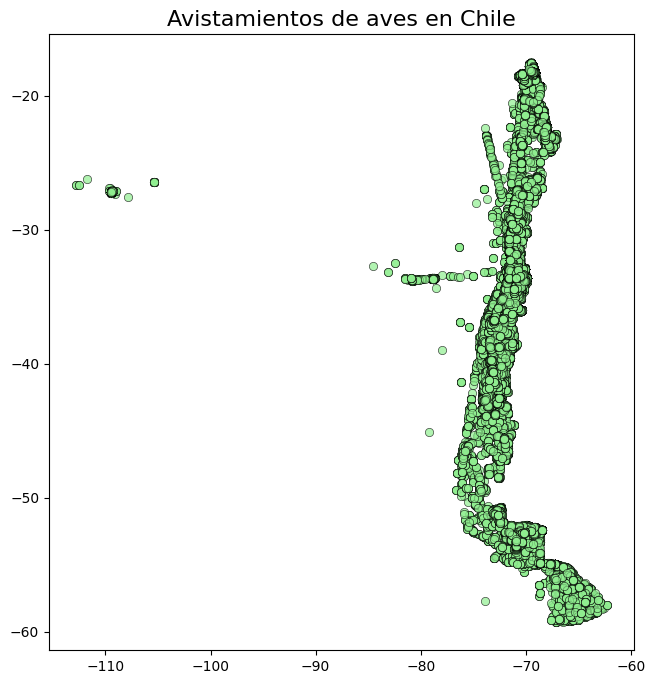

In [24]:
gdf.plot(
    figsize=(8, 8),
    color='lightgreen',
    edgecolor='black', 
    linewidth=0.5,
    alpha=0.7
)
plt.title('Avistamientos de aves en Chile', fontsize=16)
plt.show()
# Respuesta:
# Estos avistamientos se distribuyen desde el norte al sur del pais, y desde el oceano pacifico hasta el territorio limitrofe con argentina. Ademas, 
# se puede deducir que la menor densidad de datos por avistamientos de aves es en zonas del norte y sur de Chile(presenta huecos vacios de datos), probablemente 
# por la menor densidad poblacional humana, ya que al existir menor actividad humana, entonces menor es el registro de obsevaciones de aves.

### 3.4 Visualización de migraciones (2.5 puntos)

**a) (0.2 pts)** Vamos a inspeccionar los avistamientos de las siguientes 2 especies en particular:

* Run-run [(*Hymenops perspicillatus*)](https://www.avesdechile.cl/171.htm)
* Dormilona tontita [(*Muscisaxicola maclovianus*)](https://www.avesdechile.cl/043.htm)

Primero, genere dos nuevos dataframes con los avistamientos de cada especie por separado.

In [25]:
df_runrun = df[df['comName']=='Run-run'].copy()
df_dormilona = df[df['comName']=='Dormilona tontita'].copy()




**b) (0.8 pts)** Para cada una de estas especies, agrupe los datos según `year-month`. Luego, realice un gráfico que muestre la cantidad de avistamientos en el tiempo, empezando desde enero del 2022 hasta julio de 2025. Responda: ¿cómo varía cantidad de avistamientos para estas dos especies? ¿Cuáles son sus diferencias?

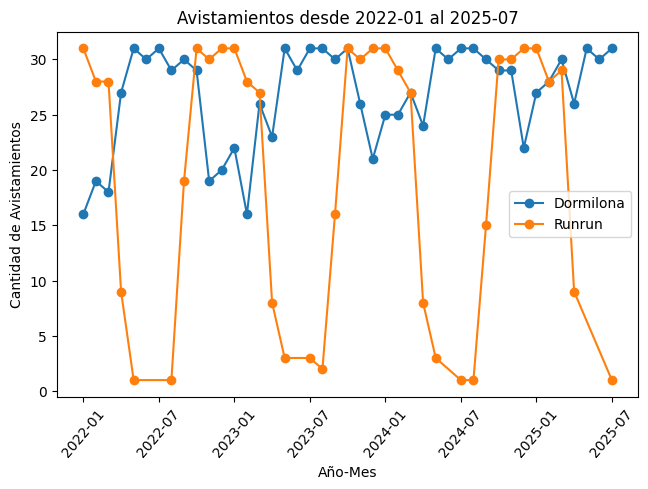

In [26]:

grupo_dormilona = df_dormilona.groupby('year-month').size()
grupo_runrun = df_runrun.groupby('year-month').size()
plt.plot(grupo_dormilona,marker='o',label='Dormilona')
plt.plot(grupo_runrun,marker='o', label='Runrun')
plt.title('Avistamientos desde 2022-01 al 2025-07')
plt.legend()
plt.xticks(grupo_dormilona.index[::6],rotation=50)
plt.tight_layout()
plt.xlabel("Año-Mes")
plt.ylabel("Cantidad de Avistamientos")
plt.show()

# Respuesta:
# La cantidad de observaciones para estas dos especies sigue un patron de zigzag o que va alternando a lo largo de tiempo. Ademas, podemos notar unas diferencias de 
# datos para estas dos especies, se observa un patrón en el que cuando una especie presenta un aumento en los avistamientos, la otra tiende a  disminuir, por ejemplo 
# cuando se tiene un maximo en Run-run disminuyen los avistamientos para la Dormilona tontita y vicersa, esto podría estar relacionado con diferencias en el comportamiento
# estacional o ecológico de ambas especies.

**b) (1 pto)** Grafique en un mapa de Chile la ubicación de cada avistamiento para cada especie mencionada por separado. Utilice el color de cada punto como indicador del mes de avistamiento (columna `month`). Para esto, utilice un **colormap cíclico** para representar los meses del año. Puede utilizar el colormap disponible en la siguiente celda, o bien utilizar otro (siempre y cuando sea cíclico).

In [27]:
import matplotlib.colors as mcolors
colors = ["coral", "blue", "coral"]
positions = [0, 0.5, 1]

# Creamos un colormap cíclico para representar meses del año
custom_cmap = mcolors.LinearSegmentedColormap.from_list("cyclic_cmap", list(zip(positions, colors)))



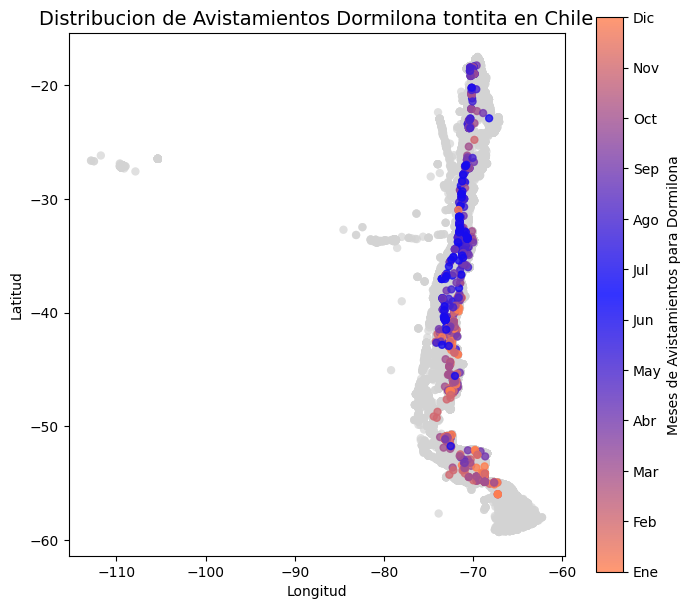

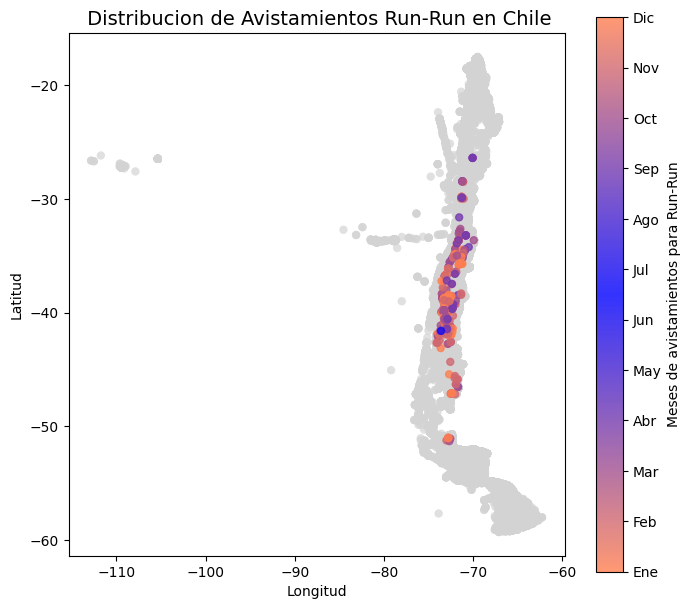

In [28]:
fig, ax = plt.subplots(figsize=(8,12))
gdf.plot(ax=ax, color='lightgray', edgecolor='None', linewidth=0.5, alpha=0.7)
sc1 = ax.scatter(
    df_dormilona['lng'], df_dormilona['lat'],
    c=df_dormilona['month'],
    cmap=custom_cmap,
    s=25, alpha=0.8,

)
cbar = plt.colorbar(sc1, ax=ax, shrink=0.6)
cbar.set_ticks(range(1, 13))
cbar.set_ticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                     'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
cbar.set_label("Meses de Avistamientos para Dormilona")

plt.title("Distribucion de Avistamientos Dormilona tontita en Chile", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()
fig, ax = plt.subplots(figsize=(8,12))
gdf.plot(ax=ax,color='lightgray', edgecolor='None', linewidth=0.5, alpha=0.7)

sc2 = ax.scatter(
    df_runrun['lng'], df_runrun['lat'],
    c=df_runrun['month'],
    cmap=custom_cmap,
    s=25, 
    alpha=0.8,

)

cbar = plt.colorbar(sc2, ax=ax, shrink=0.6)
cbar.set_ticks(range(1, 13))
cbar.set_ticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                     'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
cbar.set_label("Meses de avistamientos para Run-Run")
plt.title(" Distribucion de Avistamientos Run-Run en Chile", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

#Se uso ayuda de IA para generar los graficos, promp: como puedo usar el colormap para graficar con mis dataframes?


**c) (0.5 pts)** Describa las migraciones de estas dos especies. ¿Cómo se diferencian?

Respuesta

In [29]:
# Respuesta:
# La migracion de la dormilona tontita, se distribuye desde el extremo norte 
# hasta el sur de chile, y sus avistamientos son mas habituales durante los meses de abril a septiembre aproximadamente, mientras el runrun
# tiene una migracion que se distrubuye mas ampliamente en la zona central de chile, y es mas habitual verlos durante octubre a marzo aproximadamente (cada migracion dura 
# aproximadamente 6 meses).Dado lo anterior sus diferencias son claras, ya que el runrun es visto en chile durante la epoca de primavera-verano, mientras que la dormilona tontita
# es mas vista en otoño-invierno, por lo que sus migraciones apuntan a estaciones del año diferentes. En lo geografico se puede coincidir que ambos son vistos en la zona central,
# sin embargo, la dormilona tontita abarca mas territorio, pues esta presente desde en el sur al norte de chile, y no es concentrada solamente en una region.
